# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# downloading files from the internet
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
with open('tweet-json.txt', mode='r') as file:
    f = file.readlines()

In [6]:
import json
json_list = []
for i in range(len(f)):
    data = json.loads(f[i])  
    json_list.append(
        {
            'tweet_id': data['id'], 
            'retweet_count': data['retweet_count'], 
            'favorite_count': data['favorite_count']  
        })

In [7]:
df_json = pd.DataFrame(json_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
df_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_archive[df_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df_json[df_json.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count


In [19]:
df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])


### Quality issues
1. df_archive: remove retweets so that only original tweets remain. 

2. df_archive: random incorrect values for 'name' column. 

3. df_archive: Tweet ID 835246439529840640 has invalid rating for both 'rating_denominator' and 'rating_numerator'. 

4. df_archive: wrong datatype for 'timestamp' 

5. df_archive: wrong datatype for 'retweeted_status_user_id', 'retweeted_status_id', 'in_reply_to_user_id', and 'in_reply_to_status_id'

6. df_archive: There should only be 10s in the 'rating_denominator'

7. df_image: Values in 'p1', 'p2', 'p3' have some values that are all lower case while some are capitalized. 

8. df_archive: In columns 'doggo', 'floofer', 'puppo' and 'pupper' the values that should be null have 'None' as a string. 

### Tidiness issues
1. df_archive: Doggo, floofer, puppo, and pupper should be listed as values in a column rather than as seperate columns. 

2. all tables should be combined into one because they are describing tweets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_image_copy = df_image.copy()
df_json_copy = df_json.copy()

### Tidiness Issue #1:

#### Define: df_archive columns 'doggo', 'floofer', 'puppo', and 'pupper' will be combined into one column.

#### Code

In [21]:
df_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [22]:
df_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [23]:
df_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [24]:
df_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [25]:
df_archive['dog_type'] = df_archive.doggo
for x in range(len(df_archive)):
    if df_archive.floofer[x] != 'None':
        df_archive.dog_type[x] = df_archive.floofer[x]
    elif df_archive.puppo[x] != 'None': 
        df_archive.dog_type[x] = df_archive.puppo[x]
    elif df_archive.pupper[x] != 'None':
        df_archive.dog_type[x] = df_archive.pupper[x]
    else:
        df_archive.dog_type[x] = None

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

In [26]:
del df_archive['doggo']
del df_archive['floofer']
del df_archive['pupper']
del df_archive['puppo']

#### Test

In [27]:
df_archive.dog_type.unique()

array([None, 'puppo', 'pupper', 'floofer'], dtype=object)

In [28]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      297 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Tidiness Issue #2:

#### Define: Join all 3 tables by tweet_id

#### Code

In [29]:
df_master = df_archive.copy()

In [30]:
df_master = df_master.set_index('tweet_id').join(df_image.set_index('tweet_id'))
df_master = df_master.join(df_json.set_index('tweet_id'))

In [31]:
# for ease of access so that I do not have to use tweet_id
df_master = df_master.reset_index()

#### Test

In [32]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      297 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

### Quality Issue # 2 & 8 :

#### Define: Replace random incorrect values for name and make sure that null values are null and not marked with 'None'. 

#### Code

In [33]:
# repeatedly resampled to find incorrect names
df_master.name.sample(20)

669       Leela
96         None
129      Shikha
2078        Amy
1702      Sadie
1200       None
409        None
1268      Cecil
2117       Herb
1558     Pubert
89         None
1130       None
1185     Carper
991       Tripp
1115    Aldrick
2226     Sophie
956        None
2155       None
2028      Dylan
2292    Bradlay
Name: name, dtype: object

In [34]:
df_master.name.tail(30)

2326    quite
2327        a
2328     None
2329     None
2330     None
2331     None
2332     None
2333       an
2334        a
2335       an
2336     None
2337     None
2338     None
2339     None
2340     None
2341     None
2342     None
2343     None
2344     None
2345      the
2346      the
2347        a
2348        a
2349       an
2350        a
2351     None
2352        a
2353        a
2354        a
2355     None
Name: name, dtype: object

In [35]:
# Commonly incorrect names
incorrect_names = ['a', 'an', 'very', 'quit', 'quite', 'very', 'the', 'such']

for i, name in enumerate(df_master.name):
    for incorrect_name in incorrect_names: 
        if name == incorrect_name: 
            df_master.name[i] = None
        elif name == 'None':
          df_master.name[i] = None  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Test

In [36]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      297 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

In [37]:
df_master.name.head(30)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5         None
6          Jax
7         None
8         Zoey
9       Cassie
10        Koda
11       Bruno
12        None
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
19      Canela
20      Gerald
21     Jeffrey
22        None
23      Canela
24        None
25        None
26        Maya
27      Mingus
28       Derek
29      Roscoe
Name: name, dtype: object

In [39]:
# 'a' and 'an' have been removed as expected. 
df_master.name.tail(30)

2326    None
2327    None
2328    None
2329    None
2330    None
2331    None
2332    None
2333    None
2334    None
2335    None
2336    None
2337    None
2338    None
2339    None
2340    None
2341    None
2342    None
2343    None
2344    None
2345    None
2346    None
2347    None
2348    None
2349    None
2350    None
2351    None
2352    None
2353    None
2354    None
2355    None
Name: name, dtype: object

### Quality Issue #1:

#### Define: Remove tweets that have been retweeted

#### Code

In [40]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      297 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       20

In [41]:
df_master = df_master[df_master.retweeted_status_id.isnull()]

#### Test

In [42]:
# There are no longer and retweeted_status_id values which means that there are
# no longer any retweeted tweets in the dataframe. 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1418 non-null object
dog_type                      269 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 non

### Quality Issue # 3:

#### Define: Change the 'rating_numerator' and 'rating_denominator' with correct values by looking at 'text' column for 'tweet_id' 835246439529840640. 

#### Code

In [81]:
df_master.text[df_master.tweet_id == 835246439529840640]

# the full tweet is '@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho'

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [82]:
# It looks like the wrong numbers were used as the rating_denominator and rating_numerator
df_master.rating_denominator[df_master.tweet_id == 835246439529840640] = 10
df_master.rating_numerator[df_master.tweet_id == 835246439529840640] = 13

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Test

In [83]:
print(df_master.rating_numerator[df_master.tweet_id == 835246439529840640])
print(df_master.rating_denominator[df_master.tweet_id == 835246439529840640])

313    13
Name: rating_numerator, dtype: int64
313    10
Name: rating_denominator, dtype: int64


### Quality Issue # 4:

#### Define: Change the datatype for columns 'timestamp' and 'retweeted_status_timestamp' to datetime. 

#### Code

In [84]:
df_master.timestamp = pd.to_datetime(df_master['timestamp'], utc=True)

In [85]:
df_master.retweeted_status_timestamp = pd.to_datetime(df_master['retweeted_status_timestamp'])
df_master.retweeted_status_timestamp = None

#### Test

In [86]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1418 non-null object
dog_type                      269 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                  

### Quality Issue # 5:

#### Define: Change datatypes for 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' to integers. 

#### Code

In [87]:
df_master.in_reply_to_status_id = df_master.in_reply_to_status_id.fillna(0)
df_master.in_reply_to_user_id = df_master.in_reply_to_user_id.fillna(0)
df_master.retweeted_status_id = df_master.retweeted_status_id.fillna(0)
df_master.retweeted_status_user_id = df_master.retweeted_status_user_id.fillna(0)

In [88]:
df_master.in_reply_to_status_id = df_master.in_reply_to_status_id.astype(int)
df_master.in_reply_to_user_id = df_master.in_reply_to_user_id.astype(int)
df_master.retweeted_status_id = df_master.retweeted_status_id.astype(int)
df_master.retweeted_status_user_id = df_master.retweeted_status_user_id.astype(int)

#### Test

In [89]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null int64
retweeted_status_user_id      2175 non-null int64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1418 non-null object
dog_type                      269 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                

### Quality Issue #6: 

#### Define: Change all values in 'rating_denominator' to 10. 

#### Code

In [90]:
df_master.rating_denominator = 10

#### Test

In [91]:
df_master.rating_denominator.unique()

array([10])

### Quality Issue #7: 

#### Define: Change all values in 'p1', 'p2', 'p3' to lowercase. 

#### Code

In [92]:
df_master.p1 = df_master.p1.str.lower()
df_master.p2 = df_master.p2.str.lower()
df_master.p3 = df_master.p3.str.lower()

#### Test

In [93]:
df_master.p1.head()

0         orange
1      chihuahua
2      chihuahua
3    paper_towel
4         basset
Name: p1, dtype: object

In [94]:
df_master.p2.head()

0                 bagel
1              pekinese
2              malamute
3    labrador_retriever
4      english_springer
Name: p2, dtype: object

In [95]:
df_master.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    german_short-haired_pointer
Name: p3, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [96]:
df_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [97]:
df_master.rating_numerator.value_counts()

12      500
10      442
11      426
13      308
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
80        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [98]:
df_master.rating_numerator.describe()

count    2175.000000
mean       12.779770
std        43.188242
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [99]:
top_5 = df_master.p1.value_counts()[:5]
top_5

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
Name: p1, dtype: int64

In [100]:
df_master.favorite_count.sort_values().tail()

135     106827.0
534     107015.0
66      107956.0
1039    131075.0
413     132810.0
Name: favorite_count, dtype: float64

In [101]:
df_master.p1[df_master['favorite_count'] > 100000]

66        english_springer
135         french_bulldog
413       lakeland_terrier
534              chihuahua
1039    labrador_retriever
Name: p1, dtype: object

### Insights:
1. There is a wide range of ratings starting at 0 and ending at 1776 for the highest rated. The average dog was rated at 13 out of 10. 

2. Golden_retriever is the most posted dog. 

3. Even though golden_retriever was the most posted dog the top 5 dogs does not include a golden_retiever. 

### Visualization

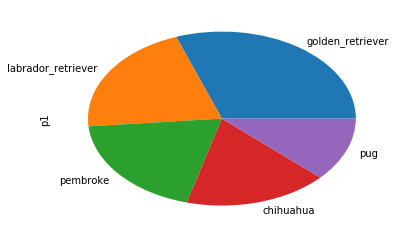

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

top_5.plot.pie()
plt.show()

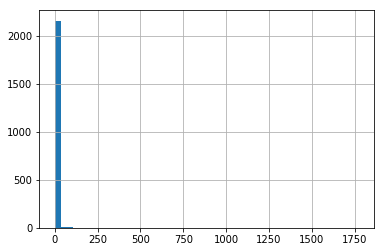

In [103]:
df_master.rating_numerator.hist(bins=50)